<a href="https://colab.research.google.com/github/swarnimsrijan/Whatsapp_chat_analyzer/blob/main/WhatsApp_Chat_Analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import pandas as pd

In [2]:
f = open('/content/WhatsApp Chat with BIT, C section, 2021-22.txt', 'r', encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

10/01/22, 10:55 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
01/01/22, 21:59 - +91 96860 05075 created group "BIT, C section, 2021-22 "
10/01/22, 10:55 - Satyam Aditya Cse added you
10/01/22, 14:52 - +91 99008 76110 left
10/01/22, 15:25 - Sanskar Cse: Guys could someone send whatever notes you’ve made today for all the classes that happened ?
10/01/22, 18:17 - Sara Cse: Can we please email our Principal for online classes or at least a hybrid mode for students who cannot attend classes? If everyone mails him, maybe he would consider it. At least we can try.
10/01/22, 18:43 - +91 77608 45438: Did electrical mam send the notes ?
10/01/22, 18:43 - +91 90198 61463: No
10/01/22, 18:46 - Supritha Kulkarni Cse: No
10/01/22, 18:49 - +91 70514 54845: Yes we can try
10/01/22, 18:49 - +91 70514 54845: No
10/01/22, 18:50 - +91 70514 54845: Ask all teachers to send the notes
10/01/22, 18:50 - +91 77608 

In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
messages = re.split(pattern, data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '+91 96860 05075 created group "BIT, C section, 2021-22 "\n',
 'Satyam Aditya Cse added you\n',
 '+91 99008 76110 left\n',
 'Sanskar Cse: Guys could someone send whatever notes you’ve made today for all the classes that happened ?\n',
 'Sara Cse: Can we please email our Principal for online classes or at least a hybrid mode for students who cannot attend classes? If everyone mails him, maybe he would consider it. At least we can try.\n',
 '+91 77608 45438: Did electrical mam send the notes ?\n',
 '+91 90198 61463: No\n',
 'Supritha Kulkarni Cse: No\n',
 '+91 70514 54845: Yes we can try\n',
 '+91 70514 54845: No\n',
 '+91 70514 54845: Ask all teachers to send the notes\n',
 '+91 77608 45438: Electrical Mam gave number to someone  pleasee ask mam to send..!\n',
 '+91 82960 97915: Yes I have asked guys\n',
 '+91 77608 45438: Thanks\n',
 '+91 82

In [7]:
dates = re.findall(pattern, data)
dates

['10/01/22, 10:55 - ',
 '01/01/22, 21:59 - ',
 '10/01/22, 10:55 - ',
 '10/01/22, 14:52 - ',
 '10/01/22, 15:25 - ',
 '10/01/22, 18:17 - ',
 '10/01/22, 18:43 - ',
 '10/01/22, 18:43 - ',
 '10/01/22, 18:46 - ',
 '10/01/22, 18:49 - ',
 '10/01/22, 18:49 - ',
 '10/01/22, 18:50 - ',
 '10/01/22, 18:50 - ',
 '10/01/22, 18:52 - ',
 '10/01/22, 19:02 - ',
 '10/01/22, 19:43 - ',
 '10/01/22, 19:43 - ',
 '10/01/22, 19:44 - ',
 '10/01/22, 19:47 - ',
 '10/01/22, 19:48 - ',
 '10/01/22, 20:01 - ',
 '10/01/22, 20:24 - ',
 '10/01/22, 20:29 - ',
 '10/01/22, 20:33 - ',
 '10/01/22, 20:44 - ',
 '10/01/22, 21:34 - ',
 '10/01/22, 21:34 - ',
 '10/01/22, 21:35 - ',
 '10/01/22, 21:35 - ',
 '10/01/22, 21:36 - ',
 '10/01/22, 21:36 - ',
 '10/01/22, 21:36 - ',
 '10/01/22, 21:37 - ',
 '10/01/22, 23:22 - ',
 '10/01/22, 23:22 - ',
 '10/01/22, 23:26 - ',
 '10/01/22, 23:27 - ',
 '11/01/22, 11:00 - ',
 '11/01/22, 11:19 - ',
 '11/01/22, 11:19 - ',
 '11/01/22, 11:19 - ',
 '11/01/22, 11:21 - ',
 '11/01/22, 12:09 - ',
 '11/01/22,

In [8]:
df = pd.DataFrame({'user_message':messages, 'message_date':dates})
#Convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M - ')

df.rename(columns= {'message_date': 'date'}, inplace = True)

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2022-01-10 10:55:00
1,"+91 96860 05075 created group ""BIT, C section,...",2022-01-01 21:59:00
2,Satyam Aditya Cse added you\n,2022-01-10 10:55:00
3,+91 99008 76110 left\n,2022-01-10 14:52:00
4,Sanskar Cse: Guys could someone send whatever ...,2022-01-10 15:25:00


In [9]:
df.shape

(5358, 2)

In [10]:
#Seperate users and messages
users = []
messages = []
for message in df['user_message']:
  entry = re.split('([\w\w]+?):\s', message)
  if entry[1:]:
    users.append(entry[1])
    messages.append(entry[2])
  else:
    users.append('group_notification')
    messages.append(entry[0])

df['user'] = users
df['messages'] = messages
df.drop(columns = ['user_message'], inplace = True)
df.head()

,date,user,messages
0,2022-01-10 10:55:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-01-01 21:59:00,group_notification,"+91 96860 05075 created group ""BIT, C section,..."
2,2022-01-10 10:55:00,group_notification,Satyam Aditya Cse added you\n
3,2022-01-10 14:52:00,group_notification,+91 99008 76110 left\n
4,2022-01-10 15:25:00,Cse,Guys could someone send whatever notes you’ve ...


In [11]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df.head()


,date,user,messages,year,month,day,hour,minute
0,2022-01-10 10:55:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,January,10,10,55
1,2022-01-01 21:59:00,group_notification,"+91 96860 05075 created group ""BIT, C section,...",2022,January,1,21,59
2,2022-01-10 10:55:00,group_notification,Satyam Aditya Cse added you\n,2022,January,10,10,55
3,2022-01-10 14:52:00,group_notification,+91 99008 76110 left\n,2022,January,10,14,52
4,2022-01-10 15:25:00,Cse,Guys could someone send whatever notes you’ve ...,2022,January,10,15,25


In [12]:
#calculation of most used words
words = []
for message in df['messages']:
  words.extend(message.split())
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 '+91',
 '96860',
 '05075',
 'created',
 'group',
 '"BIT,',
 'C',
 'section,',
 '2021-22',
 '"',
 'Satyam',
 'Aditya',
 'Cse',
 'added',
 'you',
 '+91',
 '99008',
 '76110',
 'left',
 'Guys',
 'could',
 'someone',
 'send',
 'whatever',
 'notes',
 'you’ve',
 'made',
 'today',
 'for',
 'all',
 'the',
 'classes',
 'that',
 'happened',
 '?',
 'Can',
 'we',
 'please',
 'email',
 'our',
 'Principal',
 'for',
 'online',
 'classes',
 'or',
 'at',
 'least',
 'a',
 'hybrid',
 'mode',
 'for',
 'students',
 'who',
 'cannot',
 'attend',
 'classes?',
 'If',
 'everyone',
 'mails',
 'him,',
 'maybe',
 'he',
 'would',
 'consider',
 'it.',
 'At',
 'least',
 'we',
 'can',
 'try.',
 'Did',
 'electrical',
 'mam',
 'send',
 'the',
 'notes',
 '?',
 'No',
 'No',
 'Yes',
 'we

In [13]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))


,0,1
0,to,1097
1,the,1057
2,<Media,818
3,omitted>,818
4,and,531
5,for,484
6,in,433
7,is,425
8,of,404
9,with,390


In [14]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['messages'] != '<Media omitted>\n']

In [15]:
f = open('stop_hinglish.txt', 'r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [22]:
words = []
for message in temp['messages']:
  for word in message.lower().split():
    if word not in stop_words:
      words.append(word)


In [23]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))


,0,1
0,message,296
1,class,255
2,deleted,252
3,join,204
4,students,151
5,link,133
6,group,121
7,😂,111
8,lab,100
9,internship,90


In [16]:
#remove 'group notification'
#remove 'media ommitted'
#remove stop words

In [24]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.1 MB/s eta 0:00:00


In [25]:
import emoji


In [27]:
import emoji

emojis = []
for message in temp['messages']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [28]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,927
1,🏻,139
2,🤣,92
3,🥲,80
4,👍,73
...,...,...
192,📜,1
193,🛠,1
194,🔄,1
195,🐻,1


In [29]:
df['month_num'] = df['date'].dt.month
timeline = df.groupby(['year', 'month_num', 'month']).count()['messages'].reset_index()

In [30]:
timeline

,year,month_num,month,messages
0,2022,1,January,545
1,2022,2,February,731
2,2022,3,March,1187
3,2022,4,April,559
4,2022,5,May,54
5,2022,6,June,147
6,2022,7,July,91
7,2022,8,August,92
8,2022,9,September,94
9,2022,10,October,60


In [32]:
time = []
for i in range(timeline.shape[0]):
  time.append(timeline['month'][i] + '-' + str(timeline['year'][i]))
time

['January-2022',
 'February-2022',
 'March-2022',
 'April-2022',
 'May-2022',
 'June-2022',
 'July-2022',
 'August-2022',
 'September-2022',
 'October-2022',
 'November-2022',
 'December-2022',
 'January-2023',
 'February-2023',
 'March-2023',
 'April-2023',
 'May-2023',
 'June-2023',
 'July-2023',
 'August-2023',
 'September-2023',
 'October-2023',
 'November-2023',
 'December-2023',
 'January-2024',
 'February-2024',
 'March-2024',
 'April-2024',
 'May-2024',
 'June-2024',
 'July-2024']

In [35]:
timeline['time'] = time

In [37]:
timeline

,year,month_num,month,messages,time
0,2022,1,January,545,January-2022
1,2022,2,February,731,February-2022
2,2022,3,March,1187,March-2022
3,2022,4,April,559,April-2022
4,2022,5,May,54,May-2022
5,2022,6,June,147,June-2022
6,2022,7,July,91,July-2022
7,2022,8,August,92,August-2022
8,2022,9,September,94,September-2022
9,2022,10,October,60,October-2022


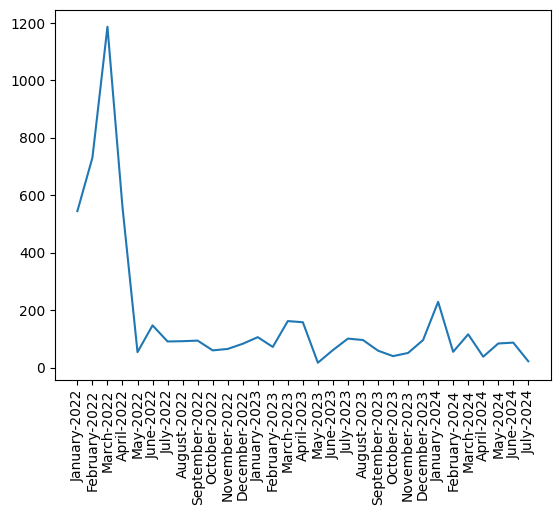

In [41]:
import matplotlib.pyplot as plt
plt.plot(timeline['time'], timeline['messages'])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
f